# Criação, treino e teste do Modelo

## Instalando bibliotecas

In [8]:
import sys
!{sys.executable} -m pip install pandas pyarrow scikit-learn imblearn

## Lendo bibliotecas e arquivo

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_parquet('../data/parquet/df_processado.parquet')

df.head()

,KNR,MOTOR,COR,QTD_HALLE_,QTD_HALLE_AGUA,QTD_HALLE_BUY,QTD_HALLE_CAB,QTD_HALLE_DKA,QTD_HALLE_ESPC,QTD_HALLE_PROC,...,QTD_SGROUP_-2,QTD_SGROUP_1,QTD_SGROUP_133,QTD_SGROUP_137,QTD_SGROUP_140,QTD_SGROUP_2,QTD_SGROUP_4,QTD_SGROUP_5,QTD_SGROUP_9830946,TEM_FALHA_ROD
0,2023-2056234,DHS,2R2R,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,2,1,1,0
1,2023-2316417,DHS,0Q0Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2023-2316420,DHS,0Q0Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2023-3016123,CWL,2R2R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,3,1,0,0,1
4,2023-3016194,DHS,0Q0Q,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0,4,0,0,0,7,2,0,0,0


In [20]:
df.shape

(87407, 35)

In [21]:
df['TEM_FALHA_ROD'].value_counts()

TEM_FALHA_ROD
0    81739
1     5668
Name: count, dtype: int64

In [9]:
# df[["QTD_STATUS_1_NOK"==0]]

## Pré processando o dado

In [22]:
df = pd.get_dummies(df, columns=['COR', 'MOTOR'], drop_first=True)

df = df.drop(columns="KNR")

In [23]:
df = df.dropna()

In [24]:
df.isna().sum()

QTD_HALLE_                0
QTD_HALLE_AGUA            0
QTD_HALLE_BUY             0
QTD_HALLE_CAB             0
QTD_HALLE_DKA             0
QTD_HALLE_ESPC            0
QTD_HALLE_PROC            0
QTD_HALLE_PROF            0
QTD_HALLE_PVC             0
QTD_HALLE_ROD             0
QTD_HALLE_RUID            0
QTD_HALLE_TLUI            0
QTD_HALLE_ZP5             0
QTD_HALLE_ZP5A            0
QTD_HALLE_ZP6             0
QTD_HALLE_ZP61            0
QTD_HALLE_ZP62            0
QTD_HALLE_ZP7             0
QTD_HALLE_ZP8             0
QTD_HALLE_ZP82            0
QTD_HALLE_ZP8R            0
QTD_SGROUP_#MULTIVALUE    0
QTD_SGROUP_-2             0
QTD_SGROUP_1              0
QTD_SGROUP_133            0
QTD_SGROUP_137            0
QTD_SGROUP_140            0
QTD_SGROUP_2              0
QTD_SGROUP_4              0
QTD_SGROUP_5              0
QTD_SGROUP_9830946        0
TEM_FALHA_ROD             0
COR_0QA1                  0
COR_2R2R                  0
COR_2RA1                  0
COR_5T5T            

In [25]:
df.head()

,QTD_HALLE_,QTD_HALLE_AGUA,QTD_HALLE_BUY,QTD_HALLE_CAB,QTD_HALLE_DKA,QTD_HALLE_ESPC,QTD_HALLE_PROC,QTD_HALLE_PROF,QTD_HALLE_PVC,QTD_HALLE_ROD,...,COR_6K6K,COR_6KA1,COR_6UA1,COR_A1A1,COR_K2A1,COR_K2K2,COR_O7O7,MOTOR_CWS,MOTOR_DHS,MOTOR_DRP
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [26]:
X = df.drop('TEM_FALHA_ROD', axis=1)
y = df['TEM_FALHA_ROD']

In [27]:
df.head()

,QTD_HALLE_,QTD_HALLE_AGUA,QTD_HALLE_BUY,QTD_HALLE_CAB,QTD_HALLE_DKA,QTD_HALLE_ESPC,QTD_HALLE_PROC,QTD_HALLE_PROF,QTD_HALLE_PVC,QTD_HALLE_ROD,...,COR_6K6K,COR_6KA1,COR_6UA1,COR_A1A1,COR_K2A1,COR_K2K2,COR_O7O7,MOTOR_CWS,MOTOR_DHS,MOTOR_DRP
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


## Dividindo o dataset entre treino e teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Definindo e treinando os modelos

### RANDOM FOREST

In [29]:
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X_train, y_train)
print(f"model_random_forest trained.")

model_random_forest trained.


In [30]:
predictions = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions)
print(f"Accuracy Random Forest Balanceado: {accuracy_rf:.2f}")
print(classification_report(y_test, predictions))

Accuracy Random Forest Balanceado: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16342
           1       1.00      1.00      1.00      1139

    accuracy                           1.00     17481
   macro avg       1.00      1.00      1.00     17481
weighted avg       1.00      1.00      1.00     17481



### KNN 

In [33]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
print(f"KNN trained.")

KNN trained.


In [34]:
predictions = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions)
print(f"Accuracy Random Forest Balanceado: {accuracy_knn:.2f}")
print(classification_report(y_test, predictions))

Accuracy Random Forest Balanceado: 0.96
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     16342
           1       1.00      0.31      0.47      1139

    accuracy                           0.96     17481
   macro avg       0.98      0.66      0.73     17481
weighted avg       0.96      0.96      0.94     17481



### XGBOOST

In [199]:
!pip3 install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [200]:
import xgboost as xgb

In [201]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
print(ratio)

11.701955495616993


In [202]:
# Create an XGBoost classifier with the scale_pos_weight value
model_xg = xgb.XGBClassifier(scale_pos_weight=ratio)

In [203]:
# Fit the model to the training data
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [204]:
y_train.value_counts()

TEM_FALHA_ROD
0.0    17354
1.0     1483
Name: count, dtype: int64

In [205]:
from sklearn.metrics import roc_auc_score, f1_score

In [206]:
# Make predictions on the test set
y_pred = model_xg.predict(X_test)
y_pred_proba = model_xg.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

AUC: 0.5367018799608625
F1 Score: 0.15171407731582787


In [207]:
from sklearn.metrics import classification_report
accuracy_xgboost = accuracy_score(y_test, y_pred)
print(f"Accuracy of xgboost: {accuracy_xgboost:.2f}")
print(classification_report(y_test, y_pred))

Accuracy of xgboost: 0.75
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      4311
         1.0       0.11      0.26      0.15       399

    accuracy                           0.75      4710
   macro avg       0.51      0.53      0.50      4710
weighted avg       0.85      0.75      0.80      4710



## Balanceando os dados

In [173]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0.0, 1882), (1.0, 1882)]


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Definindo e treinando os modelos

### RANDOM FOREST

In [175]:
model_rf_balanceado = RandomForestClassifier(n_estimators=100)

model_rf_balanceado.fit(X_train, y_train)
print(f"model_random_forest trained.")

model_random_forest trained.


In [176]:
predictions = model_rf_balanceado.predict(X_test)
accuracy_rf_balanceado = accuracy_score(y_test, predictions)
print(f"Accuracy Random Forest Balanceado: {accuracy_rf_balanceado:.2f}")
print(classification_report(y_test, predictions))

Accuracy Random Forest Balanceado: 0.51
              precision    recall  f1-score   support

         0.0       0.53      0.52      0.52       388
         1.0       0.50      0.50      0.50       365

    accuracy                           0.51       753
   macro avg       0.51      0.51      0.51       753
weighted avg       0.51      0.51      0.51       753



### KNN 

In [177]:
model_knn_balanceado = KNeighborsClassifier()

model_knn_balanceado.fit(X_train, y_train)
print(f"KNN trained.")

KNN trained.


In [178]:
predictions = model_knn_balanceado.predict(X_test)
accuracy_knn_balanceado = accuracy_score(y_test, predictions)
print(f"Accuracy Random Forest Balanceado: {accuracy_knn_balanceado:.2f}")
print(classification_report(y_test, predictions))

Accuracy Random Forest Balanceado: 0.49
              precision    recall  f1-score   support

         0.0       0.50      0.49      0.50       388
         1.0       0.47      0.48      0.47       365

    accuracy                           0.49       753
   macro avg       0.49      0.49      0.49       753
weighted avg       0.49      0.49      0.49       753



### XGBOOST

In [179]:
!pip3 install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [180]:
import xgboost as xgb

In [181]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
print(ratio)

0.984838497033619


In [182]:
# Create an XGBoost classifier with the scale_pos_weight value
model_xg_balanceado = xgb.XGBClassifier(scale_pos_weight=ratio)

In [183]:
# Fit the model to the training data
model_xg_balanceado.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [184]:
y_train.value_counts()

TEM_FALHA_ROD
1.0    1517
0.0    1494
Name: count, dtype: int64

In [185]:
from sklearn.metrics import roc_auc_score, f1_score

In [186]:
# Make predictions on the test set
y_pred = model_xg_balanceado.predict(X_test)
y_pred_proba = model_xg_balanceado.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

AUC: 0.492776444005084
F1 Score: 0.47233468286099867


In [187]:
from sklearn.metrics import classification_report
accuracy_xgboost_balanceado = accuracy_score(y_test, y_pred)
print(f"Accuracy of xgboost: {accuracy_xgboost_balanceado:.2f}")
print(classification_report(y_test, y_pred))

Accuracy of xgboost: 0.48
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       388
         1.0       0.47      0.48      0.47       365

    accuracy                           0.48       753
   macro avg       0.48      0.48      0.48       753
weighted avg       0.48      0.48      0.48       753



### GRÁFICO

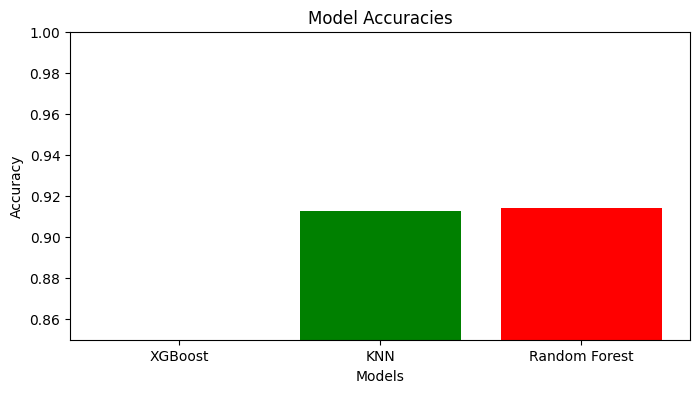

In [191]:
import matplotlib.pyplot as plt

# Names of models
models = ['XGBoost', 'KNN', 'Random Forest']
# Accuracy values
accuracies = [accuracy_xgboost, accuracy_knn, accuracy_rf]

# Creating bar plot
plt.figure(figsize=(8, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0.85, 1.0])  # Setting the limit for y-axis
plt.show()

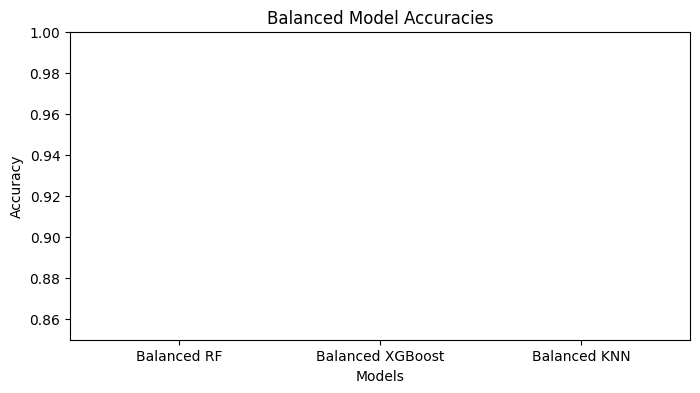

In [189]:
# Names of models
models_balanceado = ['Balanced RF', 'Balanced XGBoost', 'Balanced KNN']
# Accuracy values for balanced models
accuracies_balanceado = [accuracy_rf_balanceado, accuracy_xgboost_balanceado, accuracy_knn_balanceado]

# Creating bar plot for balanced models
plt.figure(figsize=(8, 4))
plt.bar(models_balanceado, accuracies_balanceado, color=['cyan', 'magenta', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Balanced Model Accuracies')
plt.ylim([0.85, 1.0])  # Setting the limit for y-axis
plt.show()